# Plots for "Violations of Local Friendliness with quantum computers"

### Setup and imports

In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import networkx as nx
import pandas as pd

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors

from ewfs.file_io import load_experiments
from ewfs.ewfs import calculate_branch_factor, compute_violations
from ewfs.plot import add_branch_factor_axis, plot_results

DATA_PATH = os.path.join("..", "paper_data")

## Plots

### Plot: Hardware vs. Fake vs. Simulator

In [2]:
# Load hardware data
osaka_machine_name = "ibm_osaka"
osaka_friend_sizes = range(1, 9)
osaka_num_trials = 10
osaka_shots = 10000
osaka_results = load_experiments(osaka_machine_name, osaka_friend_sizes, osaka_num_trials, osaka_shots, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "majority_vote_ibm_osaka_20240401-232029"))

torino_machine_name = "ibm_torino"
torino_friend_sizes = range(1, 9)
torino_num_trials = 5
torino_shots = 10000
torino_results = load_experiments(torino_machine_name, torino_friend_sizes, torino_num_trials, torino_shots, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "majority_vote_ibm_torino_20240731-113719"))

sherbrooke_machine_name = "ibm_sherbrooke"
sherbrooke_friend_sizes = range(1, 9)
sherbrooke_num_trials = 10
sherbrooke_shots = 10000
sherbrooke_results = load_experiments(sherbrooke_machine_name, sherbrooke_friend_sizes, sherbrooke_num_trials, sherbrooke_shots, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "majority_vote_ibm_sherbrooke_20240402-192806"))

brisbane_machine_name = "ibm_brisbane"
brisbane_friend_sizes = range(1, 9)
brisbane_num_trials = 10
brisbane_shots = 10000
brisbane_results = load_experiments(brisbane_machine_name, brisbane_friend_sizes, brisbane_num_trials, brisbane_shots, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "majority_vote_ibm_brisbane_20240402-161547"))

# Load fake data
fake_kolkata_machine_name = "fake_kolkata"
fake_kolkata_friend_sizes = range(1, 12)
fake_kolkata_num_trials = 10
fake_kolkata_shots = 10000
fake_kolkata_results = load_experiments(fake_kolkata_machine_name, fake_kolkata_friend_sizes, fake_kolkata_num_trials, fake_kolkata_shots, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "majority_vote_fake_kolkata_20240712-121133"))

fake_mumbai_machine_name = "fake_mumbai"
fake_mumbai_friend_sizes = range(1, 12)
fake_mumbai_num_trials = 10
fake_mumbai_shots = 10000
fake_mumbai_results = load_experiments(fake_mumbai_machine_name, fake_mumbai_friend_sizes, fake_mumbai_num_trials, fake_mumbai_shots, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "majority_vote_fake_mumbai_20240713-105519"))

fake_hanoi_machine_name = "fake_hanoi"
fake_hanoi_friend_sizes = range(1, 12)
fake_hanoi_num_trials = 10
fake_hanoi_shots = 10000
fake_hanoi_results = load_experiments(fake_hanoi_machine_name, fake_hanoi_friend_sizes, fake_hanoi_num_trials, fake_hanoi_shots, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "majority_vote_fake_hanoi_20240712-160146"))

fake_cairo_machine_name = "fake_cairo"
fake_cairo_friend_sizes = range(1, 12)
fake_cairo_num_trials = 10
fake_cairo_shots = 10000
fake_cairo_results = load_experiments(fake_cairo_machine_name, fake_cairo_friend_sizes, fake_cairo_num_trials, fake_cairo_shots, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "majority_vote_fake_cairo_20240713-025554"))

# Load simulator data
ideal_sim_name = "ideal_simulator"
ideal_sim_friend_sizes = range(1, 13)
ideal_sim_num_trials = 10
ideal_sim_shots = 10000
ideal_sim_results = load_experiments(ideal_sim_name, ideal_sim_friend_sizes, ideal_sim_num_trials, ideal_sim_shots, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "majority_vote_ideal_simulator_20240712-110233"))

depolarizing_1perc_name = "depolarizing_readout_1perc"
depolarizing_1perc_friend_sizes = range(1, 13)
depolarizing_1perc_num_trials = 10
depolarizing_1perc_shots = 10000
depolarizing_1perc_results = load_experiments(depolarizing_1perc_name, depolarizing_1perc_friend_sizes, depolarizing_1perc_num_trials, depolarizing_1perc_shots, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "majority_vote_depolarizing_readout_1perc_20240826-150058"))

depolarizing_2perc_name = "depolarizing_readout_2perc"
depolarizing_2perc_friend_sizes = range(1, 13)
depolarizing_2perc_num_trials = 10
depolarizing_2perc_shots = 10000
depolarizing_2perc_results = load_experiments(depolarizing_2perc_name, depolarizing_2perc_friend_sizes, depolarizing_2perc_num_trials, depolarizing_2perc_shots, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "majority_vote_depolarizing_readout_2perc_20240826-153359"))

depolarizing_3perc_name = "depolarizing_readout_3perc"
depolarizing_3perc_friend_sizes = range(1, 13)
depolarizing_3perc_num_trials = 10
depolarizing_3perc_shots = 10000
depolarizing_3perc_results = load_experiments(depolarizing_3perc_name, depolarizing_3perc_friend_sizes, depolarizing_3perc_num_trials, depolarizing_3perc_shots, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "majority_vote_depolarizing_readout_3perc_20240826-160717"))

garnet_machine_name = "garnet"
garnet_friend_sizes = range(1, 18)
garnet_num_trials = 5
garnet_shots = 2000
garnet_results = load_experiments(garnet_machine_name, garnet_friend_sizes, garnet_num_trials, garnet_shots, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "garnet_data"))

H1_E_machine_name = "H1-Emulator"
H1_E_friend_sizes = range(1, 11)
H1_E_num_trials = 5
H1_E_shots = 2000
H1_E_results = load_experiments(H1_E_machine_name, H1_E_friend_sizes, H1_E_num_trials, H1_E_shots, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "H1-Emulator_data"))

H1_1_machine_name = "H1-1"
H1_1_friend_sizes = [1,3,5,7,9,11,13,15,17]
H1_1_num_trials = 3
H1_1_shots = 200
H1_1_results = load_experiments(H1_1_machine_name, H1_1_friend_sizes, H1_1_num_trials, H1_1_shots, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "H1-1_data"))

In [3]:
friend_sizes_trials = {}
for size in H1_1_friend_sizes:
    if size == 17:
        friend_sizes_trials[size] = 7
    else:
        friend_sizes_trials[size] = 4
H1_1_results = {
    fs: {inequality: [] for inequality in ["semi_brukner"]}
    for fs in friend_sizes_trials.keys()
}

for friend_size in friend_sizes_trials.keys():
    num_trials = friend_sizes_trials[friend_size]
    for trial in range(1, num_trials+1):
        with open(os.path.join(os.path.join(DATA_PATH, "H1-1_data"), f"{H1_1_machine_name}_qubits_{friend_size}_trial_{trial}_shots_{H1_1_shots}.pickle"), "rb") as file:
            results = pickle.load(file)
        violations = compute_violations(results=results, charlie_size=friend_size, debbie_size=1, strategy="majority_vote")
        for key in violations:
            H1_1_results[friend_size][key].append(violations[key])

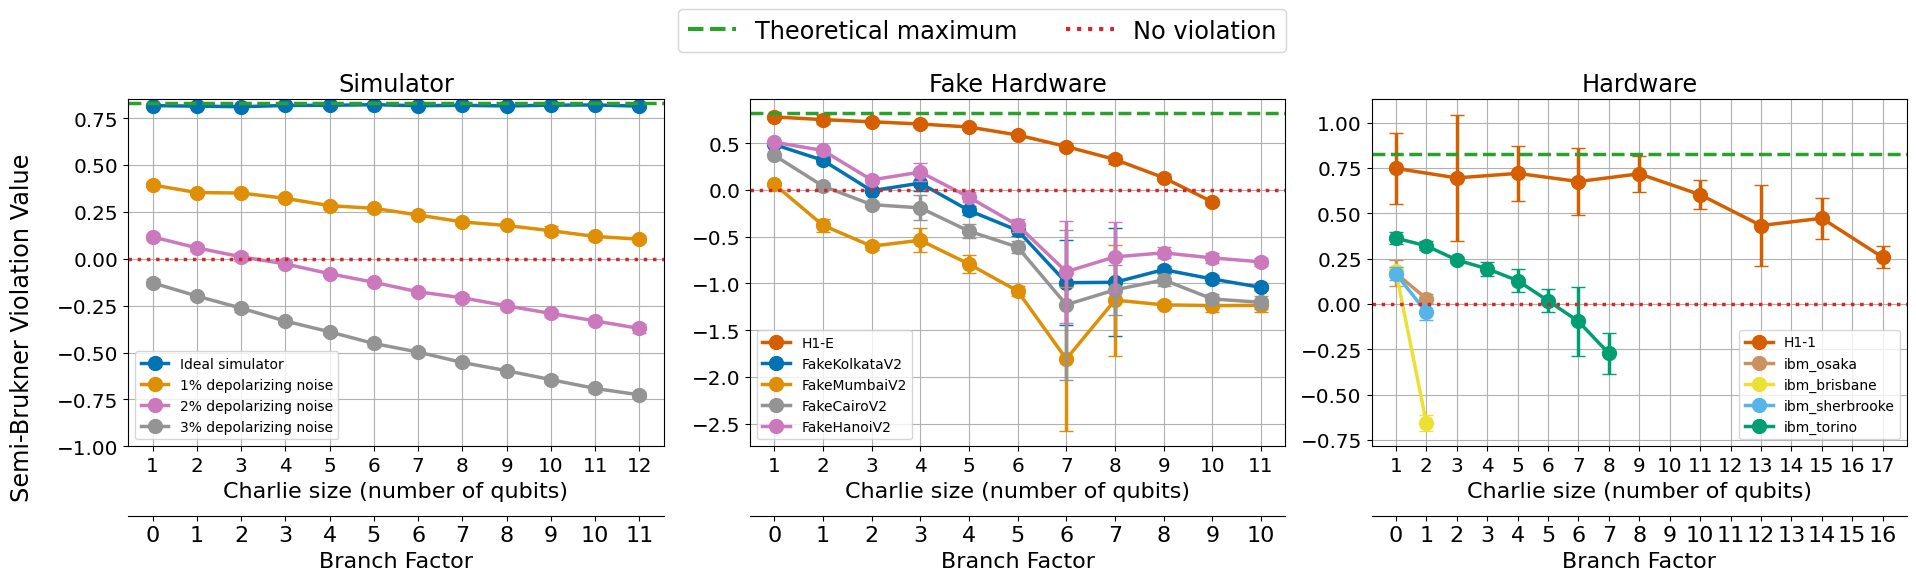

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
palette = sns.color_palette("colorblind", n_colors=16)

# Simulator plots
plot_results(axs[0], ideal_sim_results, ideal_sim_friend_sizes, plot_error_bars=True, plot_title="Ideal simulator", color=palette[0], label="Ideal simulator", show_legend=True, y_min=-1, y_max=0.85)
plot_results(axs[0], depolarizing_1perc_results, depolarizing_1perc_friend_sizes, plot_error_bars=True, plot_title="1% depolarizing noise", color=palette[1], label="1% depolarizing noise", show_legend=True)
plot_results(axs[0], depolarizing_2perc_results, depolarizing_1perc_friend_sizes, plot_error_bars=True, plot_title="2% depolarizing noise", color=palette[4], label="2% depolarizing noise", show_legend=True)
plot_results(axs[0], depolarizing_3perc_results, depolarizing_1perc_friend_sizes, plot_error_bars=True, plot_title="3% depolarizing noise", color=palette[7], label="3% depolarizing noise", show_legend=True)

# Fake hardware plots
plot_results(axs[1], H1_E_results, H1_E_friend_sizes, plot_error_bars=True, plot_title="H1-E", color=palette[13], label="H1-E", show_legend=True)
plot_results(axs[1], fake_kolkata_results, fake_kolkata_friend_sizes, plot_error_bars=True, plot_title="Fake Kolkata", color=palette[0], label="FakeKolkataV2", show_legend=True)
plot_results(axs[1], fake_mumbai_results, fake_mumbai_friend_sizes, plot_error_bars=True, plot_title="Fake Mumbai", color=palette[1], label="FakeMumbaiV2", show_legend=True)
plot_results(axs[1], fake_cairo_results, fake_cairo_friend_sizes, plot_error_bars=True, plot_title="Fake Cairo", color=palette[7], label="FakeCairoV2", show_legend=True)
plot_results(axs[1], fake_hanoi_results, fake_hanoi_friend_sizes, plot_error_bars=True, plot_title="Fake Hanoi", color=palette[4], label="FakeHanoiV2", show_legend=True)

# Hardware plots
plot_results(axs[2], H1_1_results, H1_1_friend_sizes, plot_error_bars=True, plot_title="H1-1", color=palette[13], label="H1-1", show_legend=True)
plot_results(axs[2], osaka_results, osaka_friend_sizes[0:2], plot_error_bars=True, plot_title="ibm_osaka", color=palette[5], label="ibm_osaka", show_legend=True)
plot_results(axs[2], brisbane_results, brisbane_friend_sizes[0:2], plot_error_bars=True, plot_title="ibm_brisbane", color=palette[8], label="ibm_brisbane", show_legend=True)
plot_results(axs[2], sherbrooke_results, sherbrooke_friend_sizes[0:2], plot_error_bars=True, plot_title="ibm_sherbrooke", color=palette[9], label="ibm_sherbrooke", show_legend=True)
plot_results(axs[2], torino_results, torino_friend_sizes, plot_error_bars=True, plot_title="ibm_torino", color=palette[12], label="ibm_torino", show_legend=True)

axs[0].set_title("Simulator", fontsize="xx-large")
axs[1].set_title("Fake Hardware", fontsize="xx-large")
axs[2].set_title("Hardware", fontsize="xx-large")

theoretical_max_handle = mlines.Line2D([], [], color="tab:green", linestyle="dashed", linewidth=3, label="Theoretical maximum")
no_violation_handle = mlines.Line2D([], [], color="tab:red", linestyle="dotted", linewidth=3, label="No violation")

fig.legend([theoretical_max_handle, no_violation_handle], ["Theoretical maximum", "No violation"], loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.05), fontsize="xx-large")

#fig.text(0.5, 0.02, "Charlie Size (Number of qubits)", ha="center", va="center", fontsize="xx-large")
fig.text(0.02, 0.5, "Semi-Brukner Violation Value", ha="center", va="center", rotation="vertical", fontsize="xx-large")


axs[0].set_xlabel("Charlie size (number of qubits)", size=16)
axs[1].set_xlabel("Charlie size (number of qubits)", size=16)
axs[2].set_xlabel("Charlie size (number of qubits)", size=16)
axs[2].set_xticks(range(1,18))

# ax2 = axs[0].twiny()
# branch_factors = [calculate_branch_factor(fs) for fs in ideal_sim_friend_sizes]
# ax2.set_xlim(axs[0].get_xlim())
# ax2.set_xticks(ideal_sim_friend_sizes)
# ax2.set_xticklabels(branch_factors)
# ax2.set_xlabel("Branch Factor", fontsize="large")

# ax2 = axs[1].twiny()
# branch_factors = [calculate_branch_factor(fs) for fs in fake_kolkata_friend_sizes]
# ax2.set_xlim(axs[1].get_xlim())
# ax2.set_xticks(fake_kolkata_friend_sizes)
# ax2.set_xticklabels(branch_factors)
# ax2.set_xlabel("Branch Factor", fontsize="large")

# ax2 = axs[2].twiny()
# branch_factors = [calculate_branch_factor(fs) for fs in garnet_friend_sizes]
# ax2.set_xlim(axs[2].get_xlim())
# ax2.set_xticks(garnet_friend_sizes)
# ax2.set_xticklabels(branch_factors)
# ax2.set_xlabel("Branch Factor", fontsize="large")

for ax in np.ravel(axs):
    ax.tick_params(axis="x", labelsize="x-large")
    ax.tick_params(axis="y", labelsize="x-large")    

add_branch_factor_axis(axs[0], range(1,18), size=16)
add_branch_factor_axis(axs[1], range(1,18), size=16)
add_branch_factor_axis(axs[2], range(1,18), size=16)

line_width = 2.5
axs[0].axhline(0.82843, color="tab:green", linestyle="dashed", label="_nolegend_", linewidth=line_width)
axs[0].axhline(0, color="tab:red", linestyle="dotted", label="_nolegend_", linewidth=line_width)

axs[1].axhline(0.82843, color="tab:green", linestyle="dashed", label="_nolegend_", linewidth=line_width)
axs[1].axhline(0, color="tab:red", linestyle="dotted", label="_nolegend_", linewidth=line_width)

axs[2].axhline(0.82843, color="tab:green", linestyle="dashed", label="_nolegend_", linewidth=line_width)
axs[2].axhline(0, color="tab:red", linestyle="dotted", label="_nolegend_", linewidth=line_width)

plt.tight_layout(rect=[0.03, 0.03, 0.97, 0.95])
plt.savefig("ghz_majority_vote_simulator_fakehardware_hardware_comparison.pdf", bbox_inches="tight")
plt.show()

### Plot: Majority vote vs. Random on Simulator

In [5]:
# Load simulator data (majority vote)
ideal_sim_name_majority_vote = "ideal_simulator"
ideal_sim_friend_sizes_majority_vote = range(1, 13)
ideal_sim_num_trials_majority_vote = 10
ideal_sim_shots_majority_vote = 10000
ideal_sim_results_majority_vote = load_experiments(ideal_sim_name_majority_vote, ideal_sim_friend_sizes_majority_vote, ideal_sim_num_trials_majority_vote, ideal_sim_shots_majority_vote, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "majority_vote_ideal_simulator_20240712-110233"))

depolarizing_1perc_name_majority_vote = "depolarizing_readout_1perc"
depolarizing_1perc_friend_sizes_majority_vote = range(1, 13)
depolarizing_1perc_num_trials_majority_vote = 10
depolarizing_1perc_shots_majority_vote = 10000
depolarizing_1perc_results_majority_vote = load_experiments(depolarizing_1perc_name_majority_vote, depolarizing_1perc_friend_sizes_majority_vote, depolarizing_1perc_num_trials_majority_vote, depolarizing_1perc_shots_majority_vote, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "majority_vote_depolarizing_readout_1perc_20240826-150058"))

depolarizing_2perc_name_majority_vote = "depolarizing_readout_2perc"
depolarizing_2perc_friend_sizes_majority_vote = range(1, 13)
depolarizing_2perc_num_trials_majority_vote = 10
depolarizing_2perc_shots_majority_vote = 10000
depolarizing_2perc_results_majority_vote = load_experiments(depolarizing_2perc_name_majority_vote, depolarizing_2perc_friend_sizes_majority_vote, depolarizing_2perc_num_trials_majority_vote, depolarizing_2perc_shots_majority_vote, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "majority_vote_depolarizing_readout_2perc_20240826-153359"))

depolarizing_3perc_name_majority_vote = "depolarizing_readout_3perc"
depolarizing_3perc_friend_sizes_majority_vote = range(1, 13)
depolarizing_3perc_num_trials_majority_vote = 10
depolarizing_3perc_shots_majority_vote = 10000
depolarizing_3perc_results_majority_vote = load_experiments(depolarizing_3perc_name_majority_vote, depolarizing_3perc_friend_sizes_majority_vote, depolarizing_3perc_num_trials_majority_vote, depolarizing_3perc_shots_majority_vote, strategy="majority_vote", data_path=os.path.join(DATA_PATH, "majority_vote_depolarizing_readout_3perc_20240826-160717"))

# Load simulator data (random)
ideal_sim_name_random = "ideal_simulator"
ideal_sim_friend_sizes_random = range(1, 13)
ideal_sim_num_trials_random = 10
ideal_sim_shots_random = 10000
ideal_sim_results_random = load_experiments(ideal_sim_name_random, ideal_sim_friend_sizes_random, ideal_sim_num_trials_random, ideal_sim_shots_random, strategy="random", data_path=os.path.join(DATA_PATH, "random_ideal_simulator_20240802-193806"))

depolarizing_1perc_name_random = "depolarizing_readout_1perc"
depolarizing_1perc_friend_sizes_random = range(1, 13)
depolarizing_1perc_num_trials_random = 10
depolarizing_1perc_shots_random = 10000
depolarizing_1perc_results_random = load_experiments(depolarizing_1perc_name_random, depolarizing_1perc_friend_sizes_random, depolarizing_1perc_num_trials_random, depolarizing_1perc_shots_random, strategy="random", data_path=os.path.join(DATA_PATH, "random_depolarizing_readout_1perc_20240826-163938"))

depolarizing_2perc_name_random = "depolarizing_readout_2perc"
depolarizing_2perc_friend_sizes_random = range(1, 13)
depolarizing_2perc_num_trials_random = 10
depolarizing_2perc_shots_random = 10000
depolarizing_2perc_results_random = load_experiments(depolarizing_2perc_name_random, depolarizing_2perc_friend_sizes_random, depolarizing_2perc_num_trials_random, depolarizing_2perc_shots_random, strategy="random", data_path=os.path.join(DATA_PATH, "random_depolarizing_readout_2perc_20240826-165952"))

depolarizing_3perc_name_random = "depolarizing_readout_3perc"
depolarizing_3perc_friend_sizes_random = range(1, 13)
depolarizing_3perc_num_trials_random = 10
depolarizing_3perc_shots_random = 10000
depolarizing_3perc_results_random = load_experiments(depolarizing_3perc_name_random, depolarizing_3perc_friend_sizes_random, depolarizing_3perc_num_trials_random, depolarizing_3perc_shots_random, strategy="random", data_path=os.path.join(DATA_PATH, "random_depolarizing_readout_3perc_20240826-171955"))

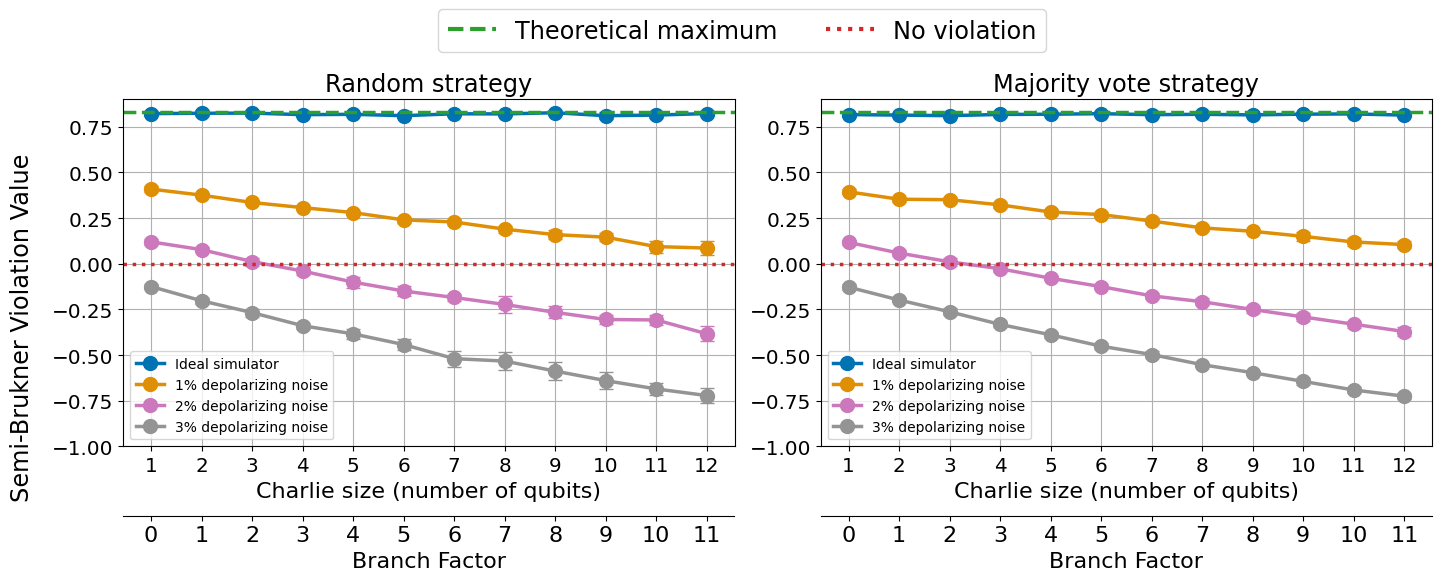

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
palette = sns.color_palette("colorblind", n_colors=8)

# Simulator plots
plot_results(axs[0], ideal_sim_results_random, ideal_sim_friend_sizes_random, plot_error_bars=True, plot_title="Ideal simulator", color=palette[0], label="Ideal simulator", show_legend=True, y_min=-1, y_max=0.9)
plot_results(axs[0], depolarizing_1perc_results_random, depolarizing_1perc_friend_sizes_random, plot_error_bars=True, plot_title="1% depolarizing noise", color=palette[1], label="1% depolarizing noise", show_legend=True)
plot_results(axs[0], depolarizing_2perc_results_random, depolarizing_1perc_friend_sizes_random, plot_error_bars=True, plot_title="2% depolarizing noise", color=palette[4], label="2% depolarizing noise", show_legend=True)
plot_results(axs[0], depolarizing_3perc_results_random, depolarizing_1perc_friend_sizes_random, plot_error_bars=True, plot_title="3% depolarizing noise", color=palette[7], label="3% depolarizing noise", show_legend=True)

plot_results(axs[1], ideal_sim_results_majority_vote, ideal_sim_friend_sizes_majority_vote, plot_error_bars=True, plot_title="Ideal simulator", color=palette[0], label="Ideal simulator", show_legend=True, y_min=-1, y_max=0.9)
plot_results(axs[1], depolarizing_1perc_results_majority_vote, depolarizing_1perc_friend_sizes_majority_vote, plot_error_bars=True, plot_title="1% depolarizing noise", color=palette[1], label="1% depolarizing noise", show_legend=True)
plot_results(axs[1], depolarizing_2perc_results_majority_vote, depolarizing_1perc_friend_sizes_majority_vote, plot_error_bars=True, plot_title="2% depolarizing noise", color=palette[4], label="2% depolarizing noise", show_legend=True)
plot_results(axs[1], depolarizing_3perc_results_majority_vote, depolarizing_1perc_friend_sizes_majority_vote, plot_error_bars=True, plot_title="3% depolarizing noise", color=palette[7], label="3% depolarizing noise", show_legend=True)

axs[0].set_title("Random strategy", fontsize="xx-large")
axs[1].set_title("Majority vote strategy", fontsize="xx-large")

theoretical_max_handle = mlines.Line2D([], [], color="tab:green", linestyle="dashed", linewidth=3, label="Theoretical maximum")
no_violation_handle = mlines.Line2D([], [], color="tab:red", linestyle="dotted", linewidth=3, label="No violation")

fig.legend([theoretical_max_handle, no_violation_handle], ["Theoretical maximum", "No violation"], loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.05), fontsize="xx-large")

#fig.text(0.5, 0.02, "Charlie size (Number of qubits)", ha="center", va="center", fontsize="xx-large")
fig.text(0.02, 0.5, "Semi-Brukner Violation Value", ha="center", va="center", rotation="vertical", fontsize="xx-large")

axs[0].set_xlabel("Charlie size (number of qubits)", size=16)
axs[1].set_xlabel("Charlie size (number of qubits)", size=16)

# ax2 = axs[0].twiny()
# branch_factors = [calculate_branch_factor(fs) for fs in ideal_sim_friend_sizes_random]
# ax2.set_xlim(axs[0].get_xlim())
# ax2.set_xticks(ideal_sim_friend_sizes_random)
# ax2.set_xticklabels(branch_factors)
# ax2.set_xlabel("Branch Factor", fontsize="large")

# ax2 = axs[1].twiny()
# branch_factors = [calculate_branch_factor(fs) for fs in ideal_sim_friend_sizes_majority_vote]
# ax2.set_xlim(axs[1].get_xlim())
# ax2.set_xticks(ideal_sim_friend_sizes_majority_vote)
# ax2.set_xticklabels(branch_factors)
# ax2.set_xlabel("Branch Factor", fontsize="large")

for ax in np.ravel(axs):
    ax.tick_params(axis="x", labelsize="x-large")
    ax.tick_params(axis="y", labelsize="x-large")    

add_branch_factor_axis(axs[0], ideal_sim_friend_sizes_random, size=16)
add_branch_factor_axis(axs[1], ideal_sim_friend_sizes_majority_vote, size=16)

line_width = 2.5
axs[0].axhline(0.82843, color="tab:green", linestyle="dashed", label="_nolegend_", linewidth=line_width)
axs[0].axhline(0, color="tab:red", linestyle="dotted", label="_nolegend_", linewidth=line_width)

axs[1].axhline(0.82843, color="tab:green", linestyle="dashed", label="_nolegend_", linewidth=line_width)
axs[1].axhline(0, color="tab:red", linestyle="dotted", label="_nolegend_", linewidth=line_width)

plt.tight_layout(rect=[0.03, 0.03, 0.97, 0.95])
plt.savefig("ghz_strategy_simulator_comparison.pdf", bbox_inches="tight")
plt.show()

### Plot: Controlled random unitaries vs. Dicke states

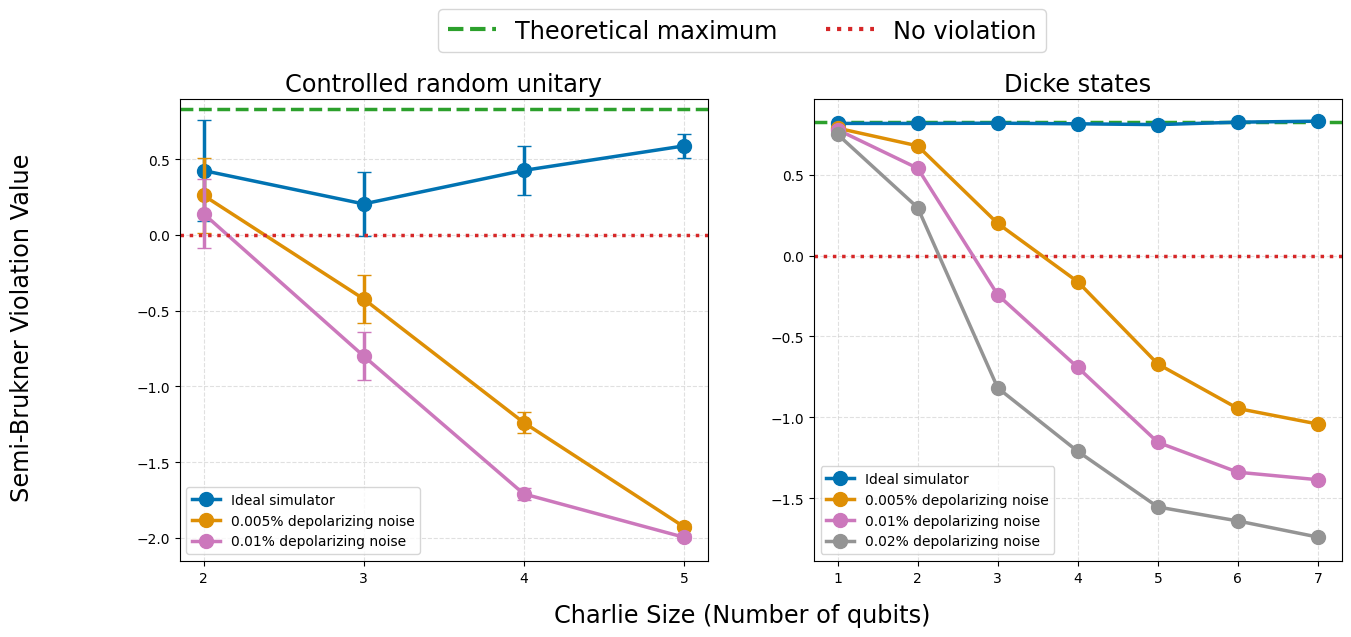

In [7]:
num_trials = 5

# Read in controlled random unitary data.
random_unitary_friend_sizes = list(range(2, 6))
with open(os.path.join(DATA_PATH, "random_unitary", "random_unitary_res.pkl"), "rb") as handle:    
    random_unitary_ideal = pickle.load(handle)

with open(os.path.join(DATA_PATH, "random_unitary", "random_unitary_res_0_0005dep.pkl"), "rb") as handle:
    random_unitary_depolarizing_005 = pickle.load(handle)

with open(os.path.join(DATA_PATH, "random_unitary", "random_unitary_res_0_001dep.pkl"), "rb") as handle:    
    random_unitary_depolarizing_01 = pickle.load(handle)

# Read in Dicke state data.
dicke_state_friend_sizes = list(range(1, 8))
with open(os.path.join(DATA_PATH, "dicke_states", "dicke_states_res_0_0005dep.pkl"), "rb") as handle:    
    dicke_states_depolarizing_005_data = pickle.load(handle)

dicke_states_depolarizing_005 = np.zeros((len(dicke_state_friend_sizes), num_trials))
for i,size in enumerate(dicke_state_friend_sizes):
    dicke_states_depolarizing_005[i] = np.array(dicke_states_depolarizing_005_data[i+1]['semi_brukner'])

with open(os.path.join(DATA_PATH, "dicke_states", "dicke_states_res_0_001dep.pkl"), "rb") as handle:    
    dicke_states_depolarizing_01_data = pickle.load(handle)

dicke_states_depolarizing_01 = np.zeros((len(dicke_state_friend_sizes), num_trials))
for i,size in enumerate(dicke_state_friend_sizes):
    dicke_states_depolarizing_01[i] = np.array(dicke_states_depolarizing_01_data[i+1]['semi_brukner'])

with open(os.path.join(DATA_PATH, "dicke_states", "dicke_states_res_0_002dep.pkl"), "rb") as handle:    
    dicke_states_depolarizing_02_data = pickle.load(handle)

dicke_states_depolarizing_02 = np.zeros((len(dicke_state_friend_sizes), num_trials))
for i,size in enumerate(dicke_state_friend_sizes):
    dicke_states_depolarizing_02[i] = np.array(dicke_states_depolarizing_02_data[i+1]['semi_brukner'])

with open(os.path.join(DATA_PATH, "dicke_states", "dicke_states_res.pkl"), "rb") as handle:
    dicke_states_noiseless_data = pickle.load(handle)

dicke_states_noiseless = np.zeros((len(dicke_state_friend_sizes), num_trials))
for i,size in enumerate(dicke_state_friend_sizes):
    dicke_states_noiseless[i] = np.array(dicke_states_noiseless_data[i+1]['semi_brukner'])

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
palette = sns.color_palette("colorblind", n_colors=8)

marker="o"
marker_size = 10
linestyle = "-"
line_width = 2.5

axs[0].plot(random_unitary_friend_sizes, np.mean(random_unitary_ideal, axis=0), label="Ideal simulator", marker=marker, markersize=marker_size, color=palette[0], linestyle=linestyle, linewidth=line_width)
axs[0].errorbar(random_unitary_friend_sizes, np.mean(random_unitary_ideal, axis=0), yerr=np.std(random_unitary_ideal, axis=0), fmt="none", capsize=5, color=palette[0], elinewidth=line_width)

axs[0].plot(random_unitary_friend_sizes, np.mean(random_unitary_depolarizing_005, axis=0), label="0.005% depolarizing noise", marker=marker, markersize=marker_size, color=palette[1], linestyle=linestyle, linewidth=line_width)
axs[0].errorbar(random_unitary_friend_sizes, np.mean(random_unitary_depolarizing_005, axis=0), yerr=np.std(random_unitary_depolarizing_005, axis=0), fmt="none", color=palette[1], capsize=5, elinewidth=line_width)

axs[0].plot(random_unitary_friend_sizes, np.mean(random_unitary_depolarizing_01, axis=0), label="0.01% depolarizing noise", marker=marker, markersize=marker_size, color=palette[4], linestyle=linestyle, linewidth=line_width)
axs[0].errorbar(random_unitary_friend_sizes, np.mean(random_unitary_depolarizing_01, axis=0), yerr=np.std(random_unitary_depolarizing_01, axis=0), fmt="none", capsize=5, color=palette[4], elinewidth=line_width)

# axs[0].plot(random_unitary_friend_sizes, np.mean(random_unitary_depolarizing_02, axis=0), label="0.02% depolarizing noise", marker=marker, markersize=marker_size, color=palette[7], linestyle=linestyle, linewidth=line_width)
# axs[0].errorbar(random_unitary_friend_sizes, np.mean(random_unitary_depolarizing_02, axis=0), yerr=np.std(random_unitary_depolarizing_02, axis=0), fmt="none", capsize=5, color=palette[7], elinewidth=line_width)

axs[0].axhline(0.828, color="tab:green", linestyle="dashed", label="_nolegend_", linewidth=line_width)
axs[0].axhline(0, color="tab:red", linestyle="dotted", label="_nolegend_", linewidth=line_width)
axs[0].set_title("Controlled random unitary", fontsize="xx-large")
axs[0].set_xticks(random_unitary_friend_sizes)

axs[1].errorbar(dicke_state_friend_sizes, np.mean(dicke_states_noiseless, axis=1), yerr=np.std(dicke_states_noiseless, axis=1), label="Ideal simulator", marker=marker, markersize=marker_size, color=palette[0], linestyle=linestyle, linewidth=line_width)
axs[1].errorbar(dicke_state_friend_sizes, np.mean(dicke_states_depolarizing_005, axis=1), yerr=np.std(dicke_states_depolarizing_005, axis=1), label="0.005% depolarizing noise", marker=marker, markersize=marker_size, color=palette[1], linestyle=linestyle, linewidth=line_width)
axs[1].errorbar(dicke_state_friend_sizes, np.mean(dicke_states_depolarizing_01, axis=1), yerr=np.std(dicke_states_depolarizing_01, axis=1), label="0.01% depolarizing noise", marker=marker, markersize=marker_size, color=palette[4], linestyle=linestyle, linewidth=line_width)
axs[1].errorbar(dicke_state_friend_sizes, np.mean(dicke_states_depolarizing_02, axis=1), yerr=np.std(dicke_states_depolarizing_02, axis=1), label="0.02% depolarizing noise", marker=marker, markersize=marker_size, color=palette[7], linestyle=linestyle, linewidth=line_width)

axs[1].axhline(0.828, color="tab:green", linestyle="dashed", label="_nolegend_", linewidth=line_width)
axs[1].axhline(0, color="tab:red", linestyle="dotted", label="_nolegend_", linewidth=line_width)
axs[1].set_title("Dicke states", fontsize="xx-large")
axs[1].set_xticks(dicke_state_friend_sizes)

theoretical_max_handle = mlines.Line2D([], [], color="tab:green", linestyle="dashed", linewidth=3, label="Theoretical maximum")
no_violation_handle = mlines.Line2D([], [], color="tab:red", linestyle="dotted", linewidth=3, label="No violation")

fig.legend([theoretical_max_handle, no_violation_handle], ["Theoretical maximum", "No violation"], loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.05), fontsize="xx-large")

fig.text(0.5, 0.02, "Charlie Size (Number of qubits)", ha="center", va="center", fontsize="xx-large")
fig.text(0.02, 0.5, "Semi-Brukner Violation Value", ha="center", va="center", rotation="vertical", fontsize="xx-large")

axs[0].grid(True, linestyle='--', alpha=0.7, color='lightgray')
axs[1].grid(True, linestyle='--', alpha=0.7, color='lightgray')

axs[0].legend()
axs[1].legend()
plt.savefig("controlled_random_unitary_vs_dicke_state.pdf", bbox_inches='tight')
plt.show()

## Estimated fidelities 

#### Hardware fidelities

In [8]:
# ibm-sherbrooke:
sherbrooke_fids = [0.96565401, 0.9536253 , 0.94447764, 0.93271272, 0.92376566, 0.91490443, 0.90350789, 0.89225331, 0.88113893, 0.87268659, 0.86181594]

# ibm-osaka
osaka_fids = [0.95933409, 0.94511104, 0.93109887, 0.92059762, 0.90694887, 0.89350249, 0.88025546, 0.86720483, 0.85434768, 0.84168116, 0.83218839]

# ibm-torino
torino_fids = [0.98130064, 0.97650567, 0.97173414, 0.96698592, 0.9622609 , 0.95755898, 0.95288002, 0.94822393, 0.94359059, 0.93897989, 0.93439172]
dd = len(torino_fids)

# Quantinuum H1:
h1_fids = [0.99572766, 0.99474599, 0.99376529, 0.99278555, 0.99180677, 0.99082897, 0.98985212, 0.98887624, 0.98790133, 0.98692737, 0.98595437, 0.98498233, 0.98401125, 0.98304113, 0.98207197, 0.98110376]
h1_fids = h1_fids[:len(torino_fids)]
#[0.9413, 0.9317, 0.9221, 0.9098, 0.871 ]

# IonQ Forte:
forte_fids = [0.97684704, 0.97060716, 0.96440714, 0.95824673, 0.95212567, 0.9460437 , 0.94000059, 0.93399608, 0.92802993, 0.92210188, 0.91621171]

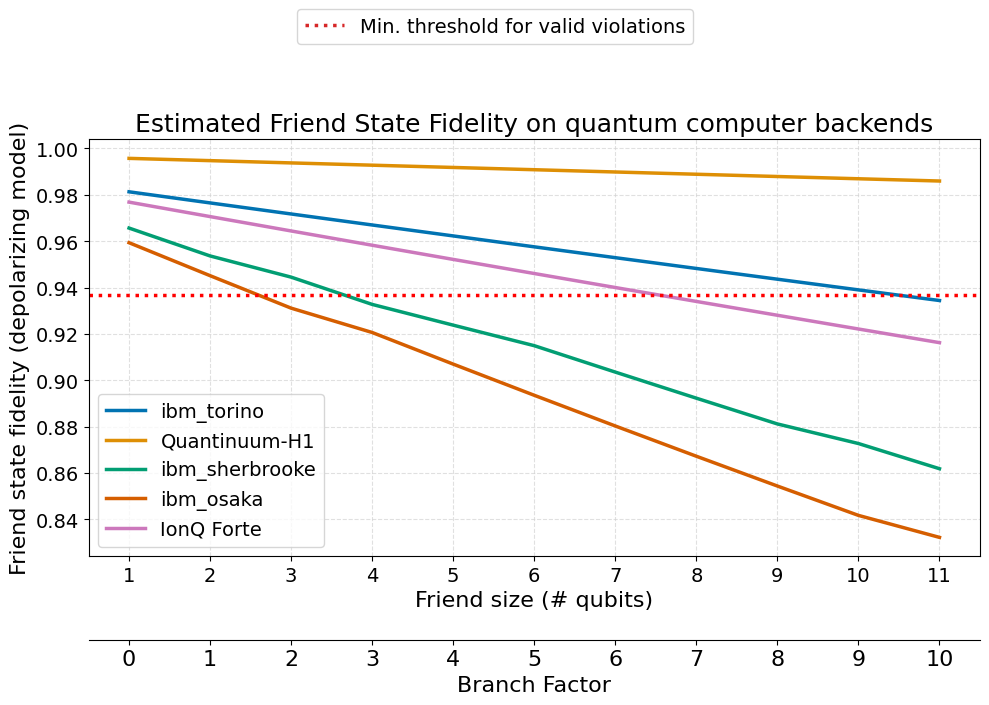

In [9]:
# Set the colorblind palette
colors = sns.color_palette("colorblind")

# Create a plot with adjusted figsize
fig, ax1 = plt.subplots(figsize=(10, 7))

# Plot data on the main x-axis with thicker lines
xs = np.asarray(range(len(h1_fids))) + 1
ax1.plot(xs, torino_fids, label="ibm_torino", color=colors[0], linewidth=2.5)
ax1.plot(xs, h1_fids, label="Quantinuum-H1", color=colors[1], linewidth=2.5)
ax1.plot(xs, sherbrooke_fids, label="ibm_sherbrooke", color=colors[2], linewidth=2.5)
ax1.plot(xs, osaka_fids, label="ibm_osaka", color=colors[3], linewidth=2.5)
ax1.plot(xs, forte_fids, label="IonQ Forte", color=colors[4], linewidth=2.5)

ax1.set_xticks(xs)
ax1.set_xlabel("Friend size (# qubits)", fontsize=16)
ax1.set_ylabel("Friend state fidelity (depolarizing model)", fontsize=16)

# Add grid lines
ax1.grid(True, linestyle='--', alpha=0.7, color='lightgray')
ax1.tick_params(axis='both', which='major', labelsize=14)

plt.legend(loc="lower left", fontsize=14)

# # Create a secondary x-axis at the top
# ax2 = ax1.twiny()

# # Set the secondary x-axis labels
# ax2.set_xlabel("Branch Factor", fontsize=16)
# ax2.set_xticks(xs)
# ax2.set_xticklabels(range(0, dd))

# # Align the secondary x-axis with the main x-axis
# ax1.set_xlim(1, dd)
# ax2.set_xlim(1, dd)
# ax2.set_xbound(ax1.get_xbound())
# ax2.tick_params(axis='x', which='major', labelsize=14)

plt.title("Estimated Friend State Fidelity on quantum computer backends", fontsize=18)

plt.axhline(y=0.9366, color="r", linestyle=":", linewidth=2.5)

no_violation_handle = mlines.Line2D([], [], color="tab:red", linestyle="dotted", linewidth=2.5, label="Min. threshold for valid violations")

fig.legend([no_violation_handle], ["Min. threshold for valid violations"], loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.05), fontsize=14)

add_branch_factor_axis(ax1, range(1, len(torino_fids) + 1), size=16)

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Save the figure
plt.savefig("friend_state_fids.pdf", bbox_inches="tight")
plt.show()

#### Hardware 1-qubit and 2-qubit

In [10]:
# ibm-sherbrooke:
sherbrooke_1qs = [46, 65, 72, 91, 98, 105, 124, 143, 162, 169, 188]
sherbrooke_2qs = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# ibm-osaka
osaka_1qs = [46, 65, 84, 91, 110, 129, 148, 167, 186, 205, 212]
osaka_2qs = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# ibm-torino
torino_1qs = [31, 37, 43, 49, 55, 61, 67, 73, 79, 85, 91]
torino_2qs = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
dd = len(torino_1qs)

# Quantinuum H1:
h1_1qs = [ 40.,  46.,  52.,  58.,  64.,  70.,  76.,  82.,  88.,  94., 100.,106., 112., 118., 124., 130.]
h1_2qs = [ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.]
h1_1qs = h1_1qs[:dd]
h1_2qs = h1_2qs[:dd]

# IonQ Forte:
forte_1qs = [57, 69, 81, 93, 105, 117, 129, 141, 153, 165, 177]
forte_2qs = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

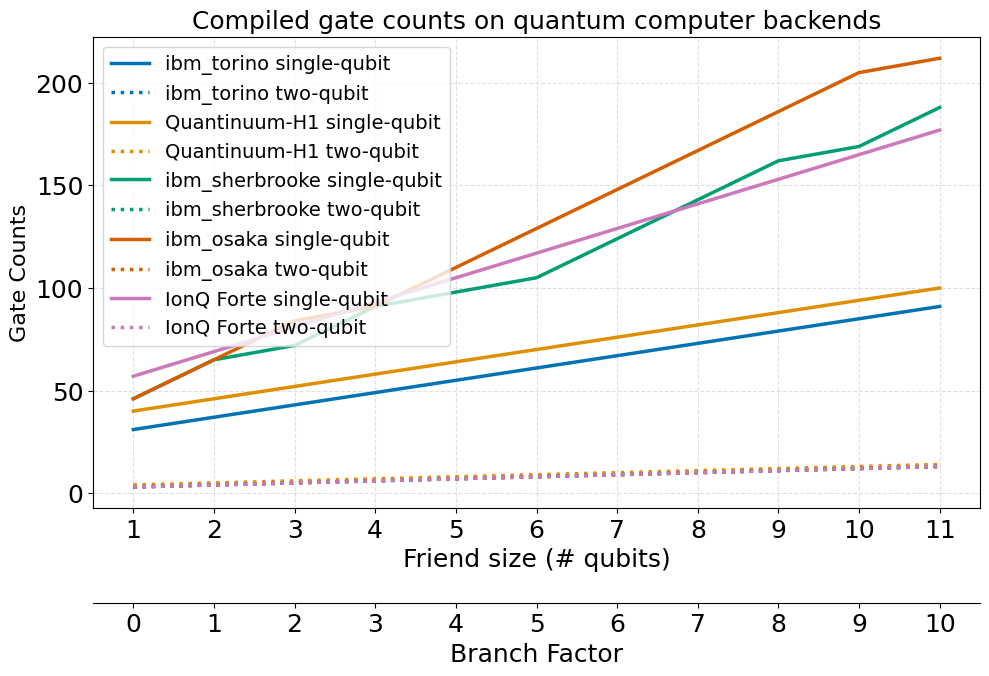

In [11]:
# Set the colorblind palette
colors = sns.color_palette("colorblind")

# Create a plot with adjusted figsize
fig, ax1 = plt.subplots(figsize=(10, 7))

# Plot data on the main x-axis with thicker lines
xs = np.asarray(range(len(torino_2qs))) + 1
ax1.plot(xs, torino_1qs, label="ibm_torino single-qubit", color=colors[0], linewidth=2.5)
ax1.plot(xs, torino_2qs, label="ibm_torino two-qubit", color=colors[0], linestyle=":", linewidth=2.5)
ax1.plot(xs, h1_1qs, label="Quantinuum-H1 single-qubit", color=colors[1], linewidth=2.5)
ax1.plot(xs, h1_2qs, label="Quantinuum-H1 two-qubit", color=colors[1], linestyle=":", linewidth=2.5)
ax1.plot(xs, sherbrooke_1qs, label="ibm_sherbrooke single-qubit", color=colors[2], linewidth=2.5)
ax1.plot(xs, sherbrooke_2qs, label="ibm_sherbrooke two-qubit", color=colors[2], linestyle=":", linewidth=2.5)
ax1.plot(xs, osaka_1qs, label="ibm_osaka single-qubit", color=colors[3], linewidth=2.5)
ax1.plot(xs, osaka_2qs, label="ibm_osaka two-qubit", color=colors[3], linestyle=":", linewidth=2.5)
ax1.plot(xs, forte_1qs, label="IonQ Forte single-qubit", color=colors[4], linewidth=2.5)
ax1.plot(xs, forte_2qs, label="IonQ Forte two-qubit", color=colors[4], linestyle=":", linewidth=2.5)

ax1.set_xticks(xs)
ax1.set_xlabel("Friend size (# qubits)", fontsize=18)
ax1.set_ylabel("Gate Counts", fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=18)

# Add grid lines
ax1.grid(True, linestyle='--', alpha=0.7, color='lightgray')

# # Create a secondary x-axis at the top
# ax2 = ax1.twiny()

# # Set the secondary x-axis labels
# ax2.set_xlabel("Branch Factor", fontsize=16)
# ax2.set_xticks(xs)
# ax2.set_xticklabels(range(0, dd))

# # Align the secondary x-axis with the main x-axis
# ax1.set_xlim(1, dd)
# ax2.set_xlim(1, dd)
# ax2.set_xbound(ax1.get_xbound())
# ax2.tick_params(axis='x', which='major', labelsize=14)

plt.title("Compiled gate counts on quantum computer backends", fontsize=18)

# Add legend in the top left corner with larger font size
ax1.legend(loc="upper left", fontsize=14)

add_branch_factor_axis(ax1, range(1, len(torino_1qs) + 1), size=18)


# Adjust the layout
plt.tight_layout()

# Save the figure
plt.savefig("gate_counts.pdf", bbox_inches="tight")
plt.show()

### IBM Torino coupling map

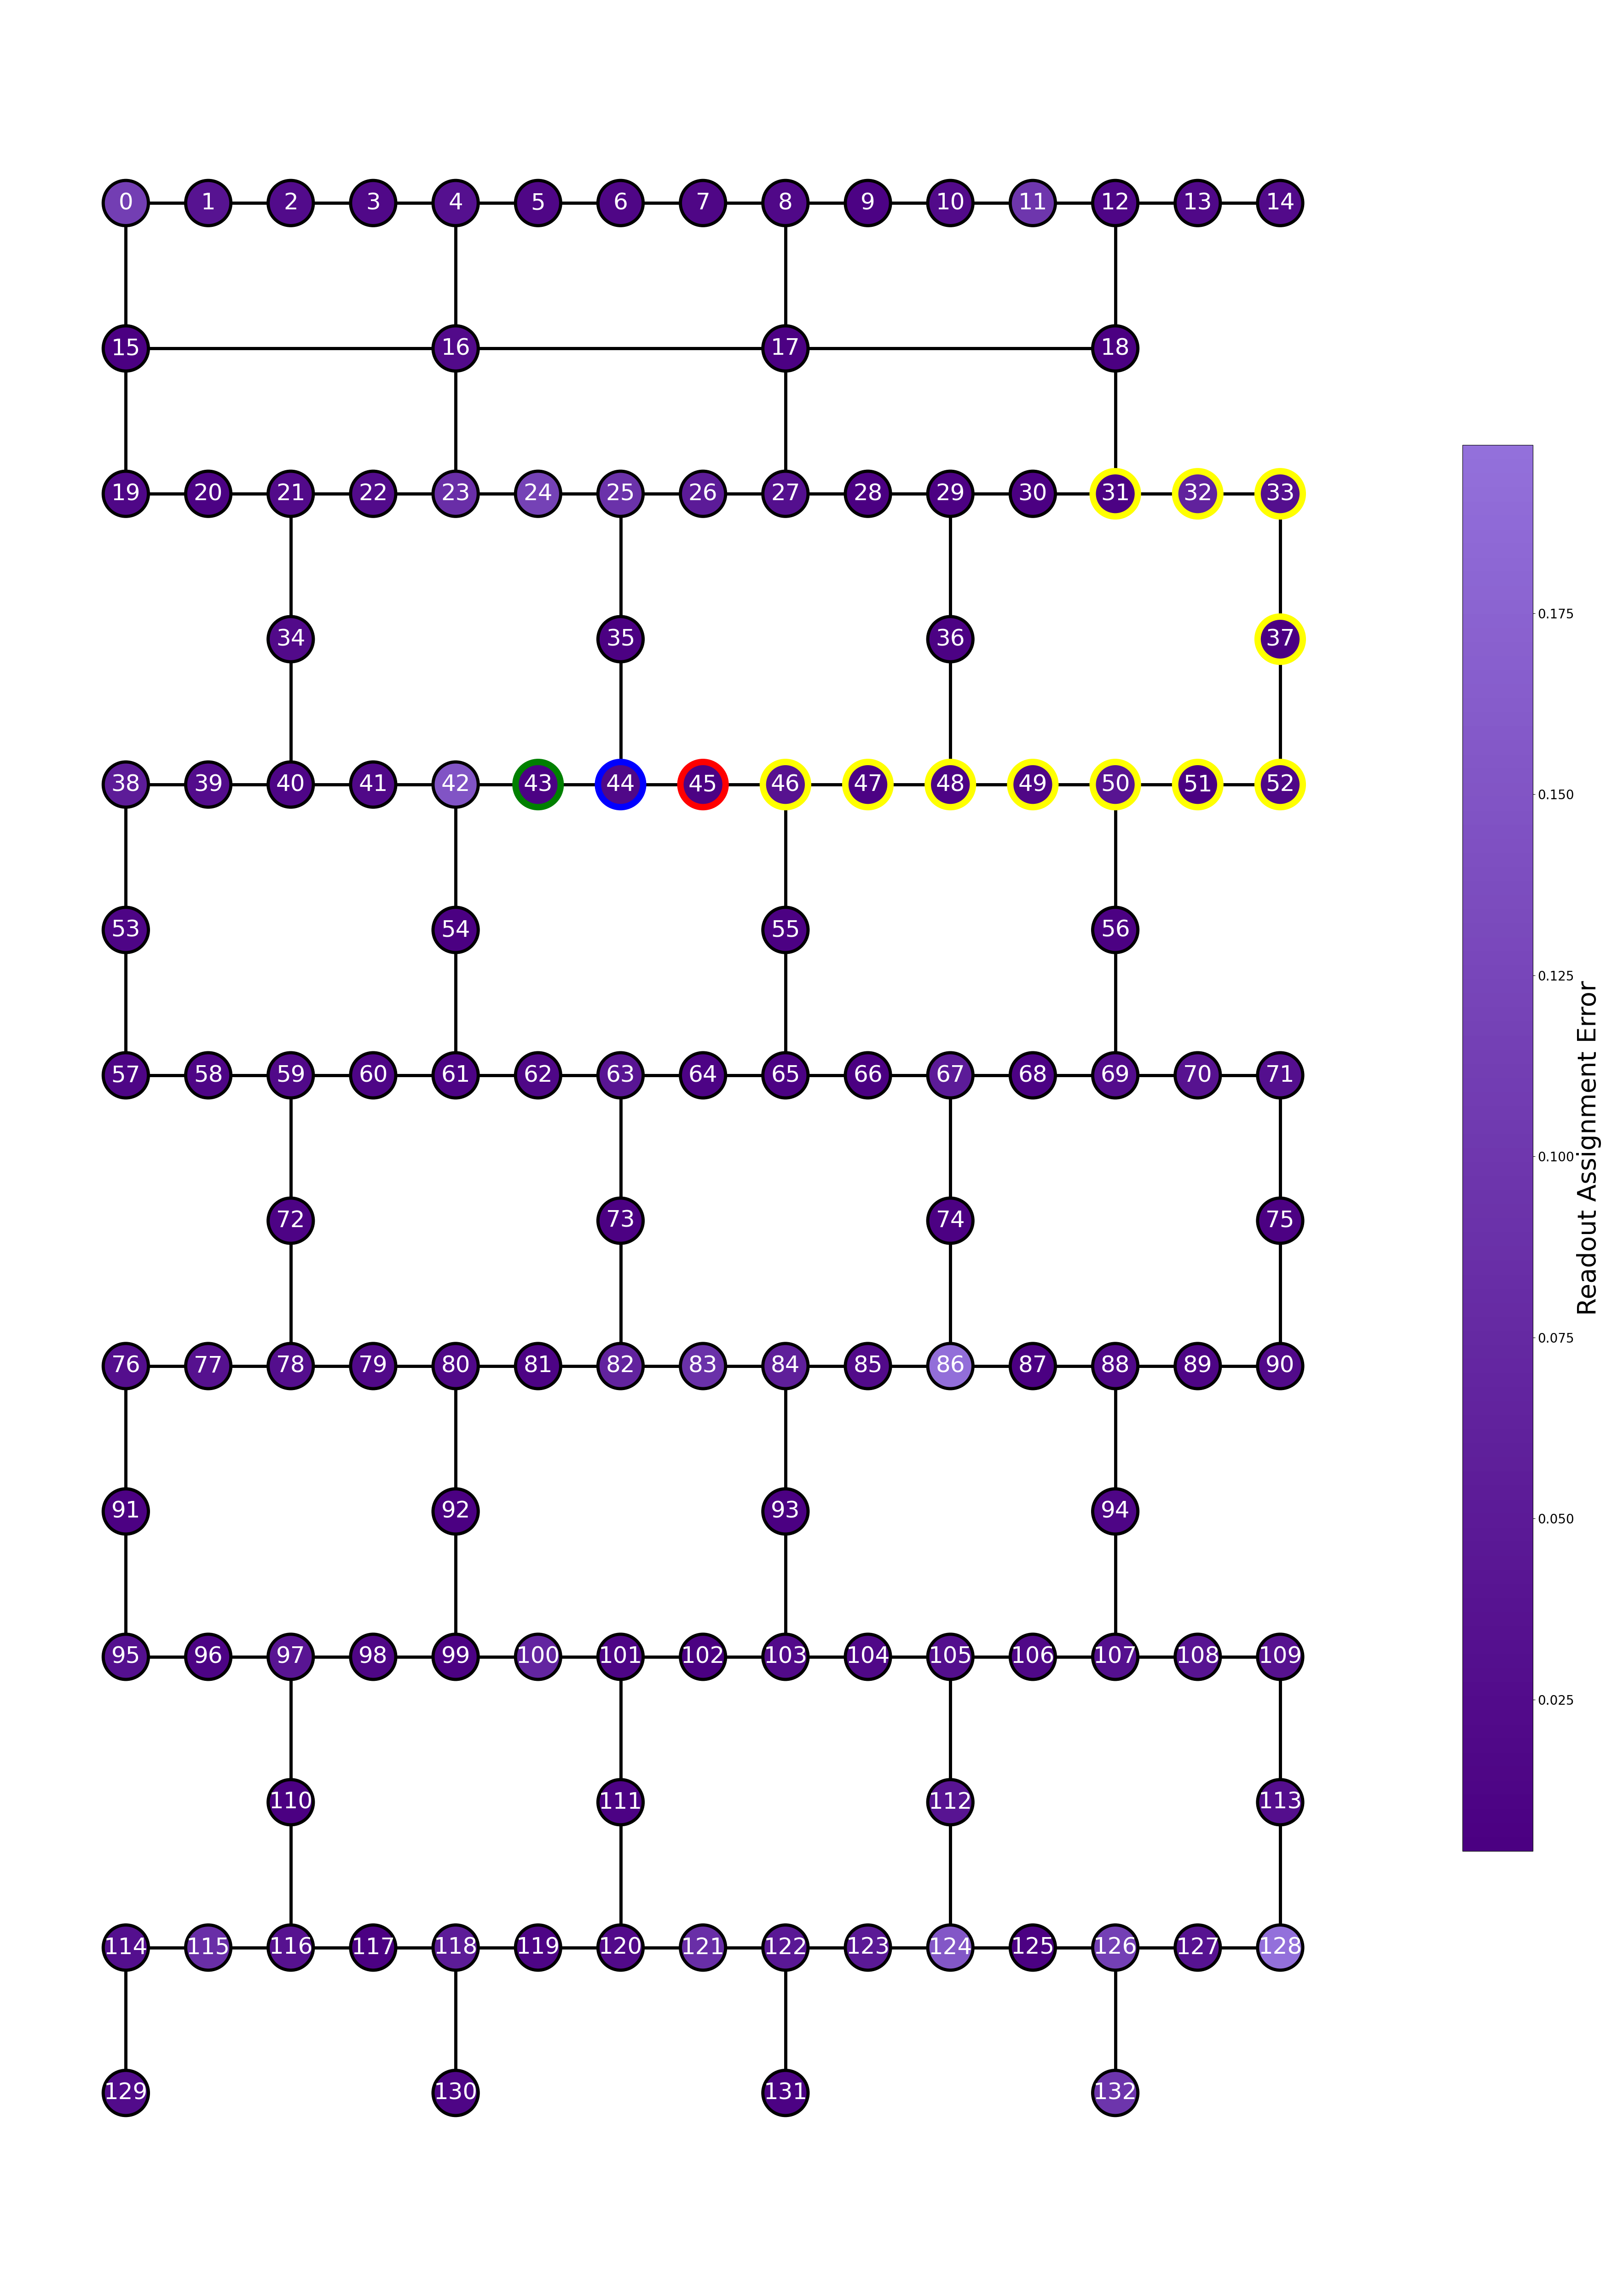

In [12]:
G = nx.Graph()

# Top row connections (0-14)
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)
G.add_edge(5, 6)
G.add_edge(6, 7)
G.add_edge(7, 8)
G.add_edge(8, 9)
G.add_edge(9, 10)
G.add_edge(10, 11)
G.add_edge(11, 12)
G.add_edge(12, 13)
G.add_edge(13, 14)

# Vertical connections from top to middle row
G.add_edge(0, 15)
G.add_edge(4, 16)
G.add_edge(8, 17)
G.add_edge(12, 18)

# Middle row connections (15-18)
G.add_edge(15, 16)
G.add_edge(16, 17)
G.add_edge(17, 18)

# Bottom row connections (19-33) and vertical connections to middle row
G.add_edge(19, 20)
G.add_edge(20, 21)
G.add_edge(21, 22)
G.add_edge(22, 23)
G.add_edge(23, 24)
G.add_edge(24, 25)
G.add_edge(25, 26)
G.add_edge(26, 27)
G.add_edge(27, 28)
G.add_edge(28, 29)
G.add_edge(29, 30)
G.add_edge(30, 31)
G.add_edge(31, 32)
G.add_edge(32, 33)
G.add_edge(15, 19)
G.add_edge(16, 23)
G.add_edge(17, 27)
G.add_edge(18, 31)

# Fourth row connections (34-37)
G.add_edge(21, 34)
G.add_edge(25, 35)
G.add_edge(29, 36)
G.add_edge(33, 37)

# Fifth row connections (38-52)
G.add_edge(38, 39)
G.add_edge(39, 40)
G.add_edge(40, 41)
G.add_edge(41, 42)
G.add_edge(42, 43)
G.add_edge(43, 44)
G.add_edge(44, 45)
G.add_edge(45, 46)
G.add_edge(46, 47)
G.add_edge(47, 48)
G.add_edge(48, 49)
G.add_edge(49, 50)
G.add_edge(50, 51)
G.add_edge(51, 52)

# Connect fifth row to fourth row
G.add_edge(34, 40)
G.add_edge(35, 44)
G.add_edge(36, 48)
G.add_edge(37, 52)

# New sixth row connections (53-56)
G.add_edge(38, 53)
G.add_edge(42, 54)
G.add_edge(46, 55)
G.add_edge(50, 56)

# New seventh row connections (57-71)
G.add_edge(57, 58)
G.add_edge(58, 59)
G.add_edge(59, 60)
G.add_edge(60, 61)
G.add_edge(61, 62)
G.add_edge(62, 63)
G.add_edge(63, 64)
G.add_edge(64, 65)
G.add_edge(65, 66)
G.add_edge(66, 67)
G.add_edge(67, 68)
G.add_edge(68, 69)
G.add_edge(69, 70)
G.add_edge(70, 71)
G.add_edge(53, 57)
G.add_edge(54, 61)
G.add_edge(55, 65)
G.add_edge(56, 69)

# New eighth row connections (72-75)
G.add_edge(59, 72)
G.add_edge(63, 73)
G.add_edge(67, 74)
G.add_edge(71, 75)

# New ninth row connections (76-90)
G.add_edge(76, 77)
G.add_edge(77, 78)
G.add_edge(78, 79)
G.add_edge(79, 80)
G.add_edge(80, 81)
G.add_edge(81, 82)
G.add_edge(82, 83)
G.add_edge(83, 84)
G.add_edge(84, 85)
G.add_edge(85, 86)
G.add_edge(86, 87)
G.add_edge(87, 88)
G.add_edge(88, 89)
G.add_edge(89, 90)

# Connect eighth row to ninth row
G.add_edge(72, 78)
G.add_edge(73, 82)
G.add_edge(74, 86)
G.add_edge(75, 90)

# New tenth row connections (91-94)
G.add_edge(76, 91)
G.add_edge(80, 92)
G.add_edge(84, 93)
G.add_edge(88, 94)

# New eleventh row connections (95-109)
G.add_edge(95, 96)
G.add_edge(96, 97)
G.add_edge(97, 98)
G.add_edge(98, 99)
G.add_edge(99, 100)
G.add_edge(100, 101)
G.add_edge(101, 102)
G.add_edge(102, 103)
G.add_edge(103, 104)
G.add_edge(104, 105)
G.add_edge(105, 106)
G.add_edge(106, 107)
G.add_edge(107, 108)
G.add_edge(108, 109)

# Connect tenth row to eleventh row
G.add_edge(91, 95)
G.add_edge(92, 99)
G.add_edge(93, 103)
G.add_edge(94, 107)

# New twelfth row connections (110-113)
G.add_edge(97, 110)
G.add_edge(101, 111)
G.add_edge(105, 112)
G.add_edge(109, 113)

# New thirteenth row connections (114-128)
G.add_edge(114, 115)
G.add_edge(115, 116)
G.add_edge(116, 117)
G.add_edge(117, 118)
G.add_edge(118, 119)
G.add_edge(119, 120)
G.add_edge(120, 121)
G.add_edge(121, 122)
G.add_edge(122, 123)
G.add_edge(123, 124)
G.add_edge(124, 125)
G.add_edge(125, 126)
G.add_edge(126, 127)
G.add_edge(127, 128)

# Connect twelfth row to thirteenth row
G.add_edge(110, 116)
G.add_edge(111, 120)
G.add_edge(112, 124)
G.add_edge(113, 128)

# New fourteenth row connections (129-132)
G.add_edge(114, 129)
G.add_edge(118, 130)
G.add_edge(122, 131)
G.add_edge(126, 132)

# Explicitly set positions
spacing_factor_x = 2
spacing_factor_y = 3

pos = {
    0: (0 * spacing_factor_x, 0),
    1: (1 * spacing_factor_x, 0),
    2: (2 * spacing_factor_x, 0),
    3: (3 * spacing_factor_x, 0),
    4: (4 * spacing_factor_x, 0),
    5: (5 * spacing_factor_x, 0),
    6: (6 * spacing_factor_x, 0),
    7: (7 * spacing_factor_x, 0),
    8: (8 * spacing_factor_x, 0),
    9: (9 * spacing_factor_x, 0),
    10: (10 * spacing_factor_x, 0),
    11: (11 * spacing_factor_x, 0),
    12: (12 * spacing_factor_x, 0),
    13: (13 * spacing_factor_x, 0),
    14: (14 * spacing_factor_x, 0),
    15: (0 * spacing_factor_x, -1 * spacing_factor_y),
    16: (4 * spacing_factor_x, -1 * spacing_factor_y),
    17: (8 * spacing_factor_x, -1 * spacing_factor_y),
    18: (12 * spacing_factor_x, -1 * spacing_factor_y),
    19: (0 * spacing_factor_x, -2 * spacing_factor_y),
    20: (1 * spacing_factor_x, -2 * spacing_factor_y),
    21: (2 * spacing_factor_x, -2 * spacing_factor_y),
    22: (3 * spacing_factor_x, -2 * spacing_factor_y),
    23: (4 * spacing_factor_x, -2 * spacing_factor_y),
    24: (5 * spacing_factor_x, -2 * spacing_factor_y),
    25: (6 * spacing_factor_x, -2 * spacing_factor_y),
    26: (7 * spacing_factor_x, -2 * spacing_factor_y),
    27: (8 * spacing_factor_x, -2 * spacing_factor_y),
    28: (9 * spacing_factor_x, -2 * spacing_factor_y),
    29: (10 * spacing_factor_x, -2 * spacing_factor_y),
    30: (11 * spacing_factor_x, -2 * spacing_factor_y),
    31: (12 * spacing_factor_x, -2 * spacing_factor_y),
    32: (13 * spacing_factor_x, -2 * spacing_factor_y),
    33: (14 * spacing_factor_x, -2 * spacing_factor_y),
    34: (2 * spacing_factor_x, -3 * spacing_factor_y),
    35: (6 * spacing_factor_x, -3 * spacing_factor_y),
    36: (10 * spacing_factor_x, -3 * spacing_factor_y),
    37: (14 * spacing_factor_x, -3 * spacing_factor_y),
    38: (0 * spacing_factor_x, -4 * spacing_factor_y),
    39: (1 * spacing_factor_x, -4 * spacing_factor_y),
    40: (2 * spacing_factor_x, -4 * spacing_factor_y),
    41: (3 * spacing_factor_x, -4 * spacing_factor_y),
    42: (4 * spacing_factor_x, -4 * spacing_factor_y),
    43: (5 * spacing_factor_x, -4 * spacing_factor_y),
    44: (6 * spacing_factor_x, -4 * spacing_factor_y),
    45: (7 * spacing_factor_x, -4 * spacing_factor_y),
    46: (8 * spacing_factor_x, -4 * spacing_factor_y),
    47: (9 * spacing_factor_x, -4 * spacing_factor_y),
    48: (10 * spacing_factor_x, -4 * spacing_factor_y),
    49: (11 * spacing_factor_x, -4 * spacing_factor_y),
    50: (12 * spacing_factor_x, -4 * spacing_factor_y),
    51: (13 * spacing_factor_x, -4 * spacing_factor_y),
    52: (14 * spacing_factor_x, -4 * spacing_factor_y),
    53: (0 * spacing_factor_x, -5 * spacing_factor_y),
    54: (4 * spacing_factor_x, -5 * spacing_factor_y),
    55: (8 * spacing_factor_x, -5 * spacing_factor_y),
    56: (12 * spacing_factor_x, -5 * spacing_factor_y),
    57: (0 * spacing_factor_x, -6 * spacing_factor_y),
    58: (1 * spacing_factor_x, -6 * spacing_factor_y),
    59: (2 * spacing_factor_x, -6 * spacing_factor_y),
    60: (3 * spacing_factor_x, -6 * spacing_factor_y),
    61: (4 * spacing_factor_x, -6 * spacing_factor_y),
    62: (5 * spacing_factor_x, -6 * spacing_factor_y),
    63: (6 * spacing_factor_x, -6 * spacing_factor_y),
    64: (7 * spacing_factor_x, -6 * spacing_factor_y),
    65: (8 * spacing_factor_x, -6 * spacing_factor_y),
    66: (9 * spacing_factor_x, -6 * spacing_factor_y),
    67: (10 * spacing_factor_x, -6 * spacing_factor_y),
    68: (11 * spacing_factor_x, -6 * spacing_factor_y),
    69: (12 * spacing_factor_x, -6 * spacing_factor_y),
    70: (13 * spacing_factor_x, -6 * spacing_factor_y),
    71: (14 * spacing_factor_x, -6 * spacing_factor_y),
    # New eighth row positions (72-75)
    72: (2 * spacing_factor_x, -7 * spacing_factor_y),
    73: (6 * spacing_factor_x, -7 * spacing_factor_y),
    74: (10 * spacing_factor_x, -7 * spacing_factor_y),
    75: (14 * spacing_factor_x, -7 * spacing_factor_y),
    
    # New ninth row positions (76-90)
    76: (0 * spacing_factor_x, -8 * spacing_factor_y),
    77: (1 * spacing_factor_x, -8 * spacing_factor_y),
    78: (2 * spacing_factor_x, -8 * spacing_factor_y),
    79: (3 * spacing_factor_x, -8 * spacing_factor_y),
    80: (4 * spacing_factor_x, -8 * spacing_factor_y),
    81: (5 * spacing_factor_x, -8 * spacing_factor_y),
    82: (6 * spacing_factor_x, -8 * spacing_factor_y),
    83: (7 * spacing_factor_x, -8 * spacing_factor_y),
    84: (8 * spacing_factor_x, -8 * spacing_factor_y),
    85: (9 * spacing_factor_x, -8 * spacing_factor_y),
    86: (10 * spacing_factor_x, -8 * spacing_factor_y),
    87: (11 * spacing_factor_x, -8 * spacing_factor_y),
    88: (12 * spacing_factor_x, -8 * spacing_factor_y),
    89: (13 * spacing_factor_x, -8 * spacing_factor_y),
    90: (14 * spacing_factor_x, -8 * spacing_factor_y),
    # New tenth row positions (91-94)
    91: (0 * spacing_factor_x, -9 * spacing_factor_y),
    92: (4 * spacing_factor_x, -9 * spacing_factor_y),
    93: (8 * spacing_factor_x, -9 * spacing_factor_y),
    94: (12 * spacing_factor_x, -9 * spacing_factor_y),
    
    # New eleventh row positions (95-109)
    95: (0 * spacing_factor_x, -10 * spacing_factor_y),
    96: (1 * spacing_factor_x, -10 * spacing_factor_y),
    97: (2 * spacing_factor_x, -10 * spacing_factor_y),
    98: (3 * spacing_factor_x, -10 * spacing_factor_y),
    99: (4 * spacing_factor_x, -10 * spacing_factor_y),
    100: (5 * spacing_factor_x, -10 * spacing_factor_y),
    101: (6 * spacing_factor_x, -10 * spacing_factor_y),
    102: (7 * spacing_factor_x, -10 * spacing_factor_y),
    103: (8 * spacing_factor_x, -10 * spacing_factor_y),
    104: (9 * spacing_factor_x, -10 * spacing_factor_y),
    105: (10 * spacing_factor_x, -10 * spacing_factor_y),
    106: (11 * spacing_factor_x, -10 * spacing_factor_y),
    107: (12 * spacing_factor_x, -10 * spacing_factor_y),
    108: (13 * spacing_factor_x, -10 * spacing_factor_y),
    109: (14 * spacing_factor_x, -10 * spacing_factor_y),   

    # New twelfth row positions (110-113)
    110: (2 * spacing_factor_x, -11 * spacing_factor_y),
    111: (6 * spacing_factor_x, -11 * spacing_factor_y),
    112: (10 * spacing_factor_x, -11 * spacing_factor_y),
    113: (14 * spacing_factor_x, -11 * spacing_factor_y),
    
    # New thirteenth row positions (114-128)
    114: (0 * spacing_factor_x, -12 * spacing_factor_y),
    115: (1 * spacing_factor_x, -12 * spacing_factor_y),
    116: (2 * spacing_factor_x, -12 * spacing_factor_y),
    117: (3 * spacing_factor_x, -12 * spacing_factor_y),
    118: (4 * spacing_factor_x, -12 * spacing_factor_y),
    119: (5 * spacing_factor_x, -12 * spacing_factor_y),
    120: (6 * spacing_factor_x, -12 * spacing_factor_y),
    121: (7 * spacing_factor_x, -12 * spacing_factor_y),
    122: (8 * spacing_factor_x, -12 * spacing_factor_y),
    123: (9 * spacing_factor_x, -12 * spacing_factor_y),
    124: (10 * spacing_factor_x, -12 * spacing_factor_y),
    125: (11 * spacing_factor_x, -12 * spacing_factor_y),
    126: (12 * spacing_factor_x, -12 * spacing_factor_y),
    127: (13 * spacing_factor_x, -12 * spacing_factor_y),
    128: (14 * spacing_factor_x, -12 * spacing_factor_y),
    
    # New fourteenth row positions (129-132)
    129: (0 * spacing_factor_x, -13 * spacing_factor_y),
    130: (4 * spacing_factor_x, -13 * spacing_factor_y),
    131: (8 * spacing_factor_x, -13 * spacing_factor_y),
    132: (12 * spacing_factor_x, -13 * spacing_factor_y),
}

data = pd.read_csv(os.path.join(DATA_PATH, 'ibm_torino_calibrations.csv'), sep=',', quotechar='"')
readout_data = data.set_index('Qubit')['Readout assignment error '].astype(float)

# Create a custom purple colormap (dark to light purple)
colors = ['#4B0082', '#9370DB']  # Indigo to MediumPurple
n_bins = 100
cmap = mcolors.LinearSegmentedColormap.from_list('custom_purple', colors, N=n_bins)

# Normalize the readout error values
vmin = readout_data.min()
vmax = readout_data.max()
norm = plt.Normalize(vmin=vmin, vmax=vmax)

# Set node colors based on readout values
node_colors = []
for node in G.nodes():
    error = readout_data.get(node, 0)
    color = cmap(norm(error))
    node_colors.append(color)

# Drawing the graph
plt.figure(figsize=(35, 50))

# Draw edges
nx.draw_networkx_edges(G, pos, width=5)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=5000, edgecolors="black", linewidths=5)

# Highlight nodes used with a yellow border
alice_highlighted_nodes = [45]
nx.draw_networkx_nodes(G, pos, nodelist=alice_highlighted_nodes, node_color="none", node_size=5000, edgecolors="red", linewidths=10)

bob_highlighted_nodes = [44]
nx.draw_networkx_nodes(G, pos, nodelist=bob_highlighted_nodes, node_color="none", node_size=5000, edgecolors="blue", linewidths=10)

debbie_highlighted_nodes = [43]
nx.draw_networkx_nodes(G, pos, nodelist=debbie_highlighted_nodes, node_color="none", node_size=5000, edgecolors="green", linewidths=10)

charlie_highlighted_nodes = [46 + i for i in range(7)] + [37, 33, 32, 31]
nx.draw_networkx_nodes(G, pos, nodelist=charlie_highlighted_nodes, node_color="none", node_size=5000, edgecolors="yellow", linewidths=10)


# Draw labels with white text
nx.draw_networkx_labels(G, pos, font_size=36, font_color="white")

# Add a colorbar with larger label
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, label="Readout Assignment Error", ax=plt.gca(), fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel("Readout Assignment Error", fontsize=40)

plt.axis("off")
plt.tight_layout()
plt.savefig("ibm_torino_coupling_map.pdf", bbox_inches="tight")
plt.show()